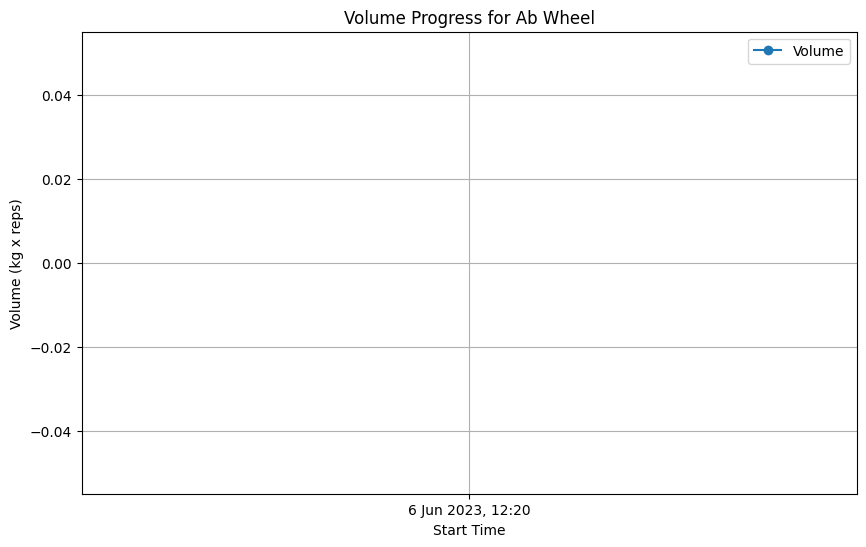

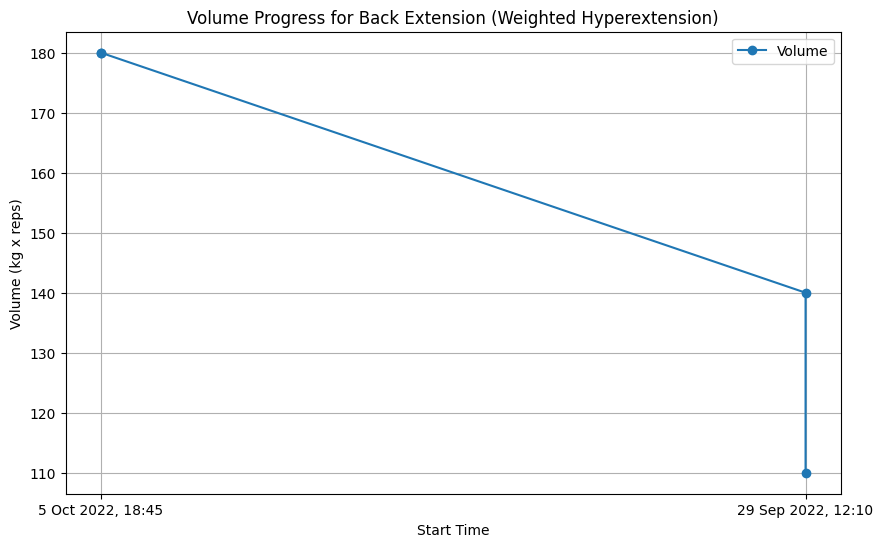

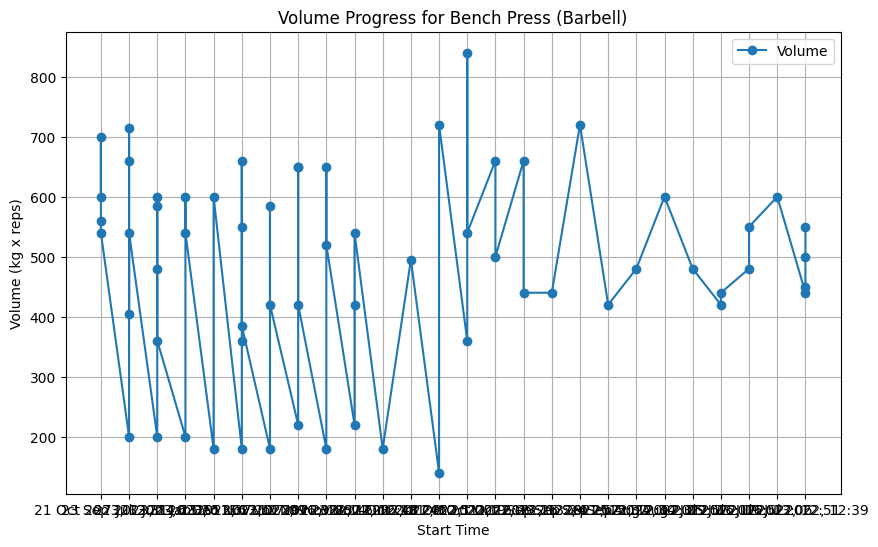

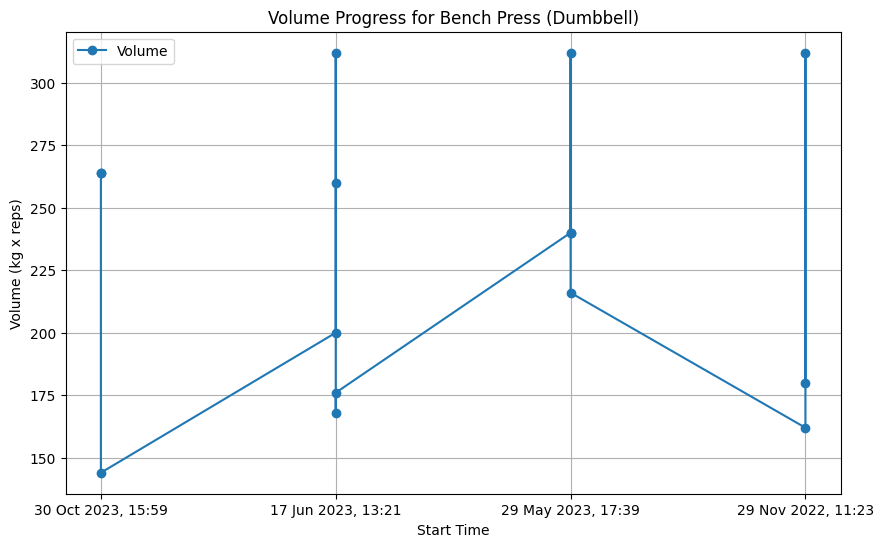

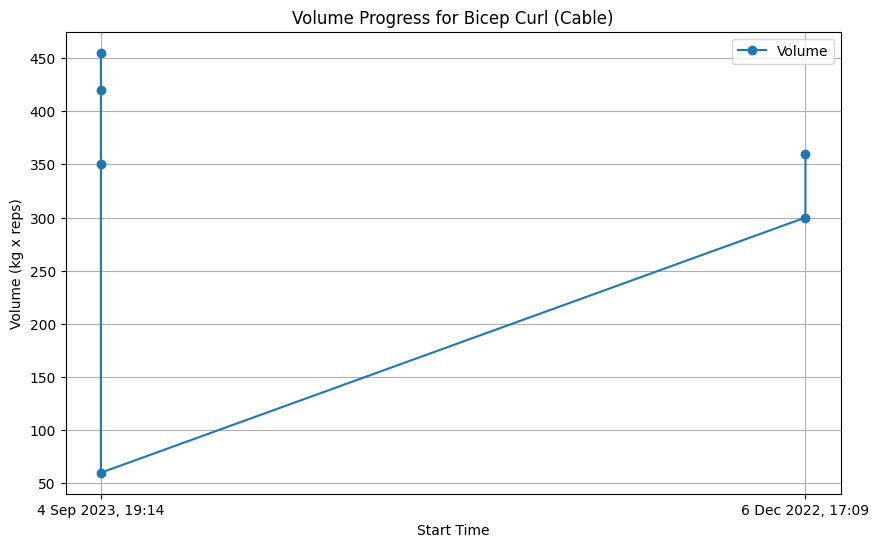

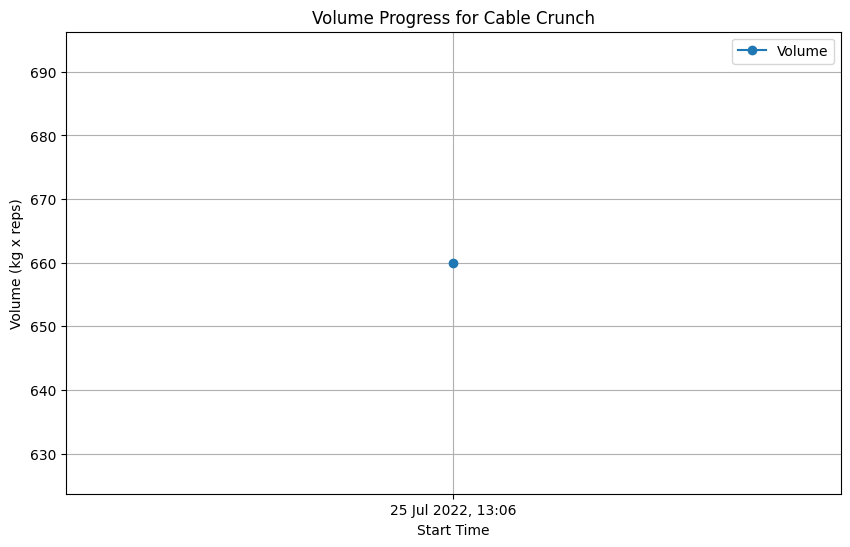

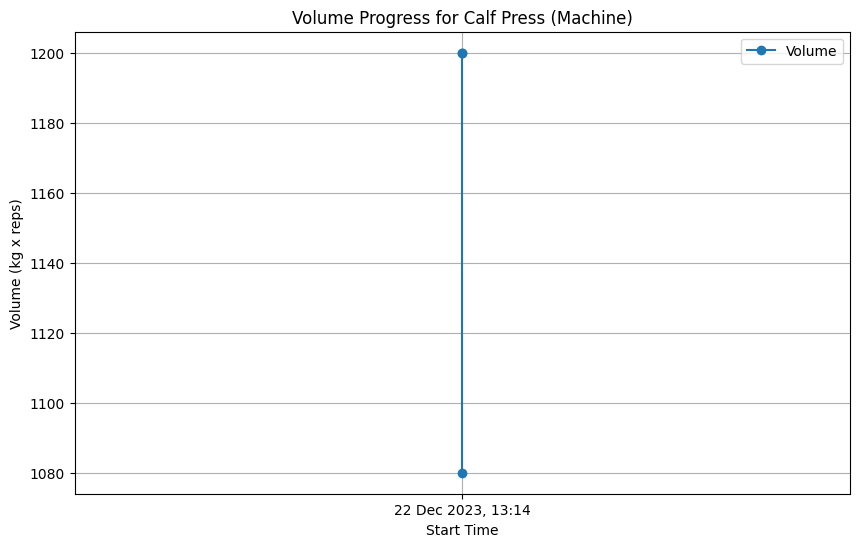

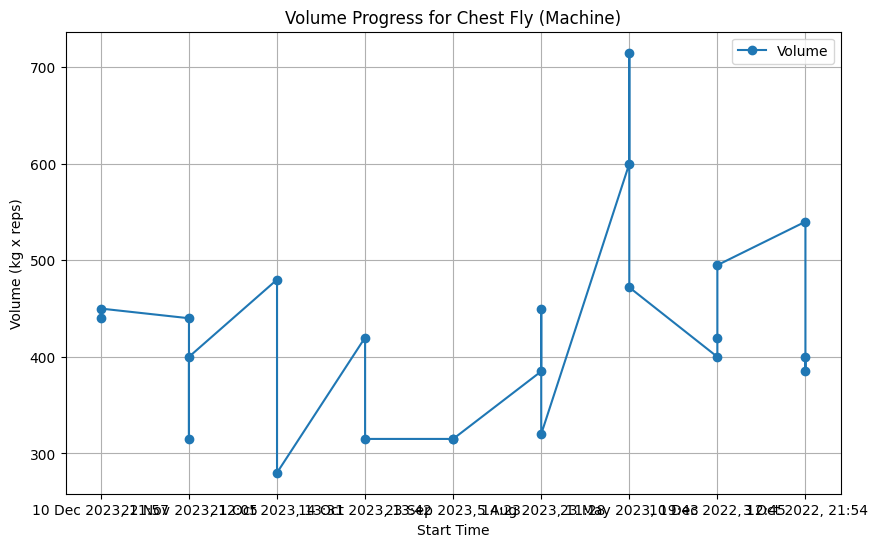

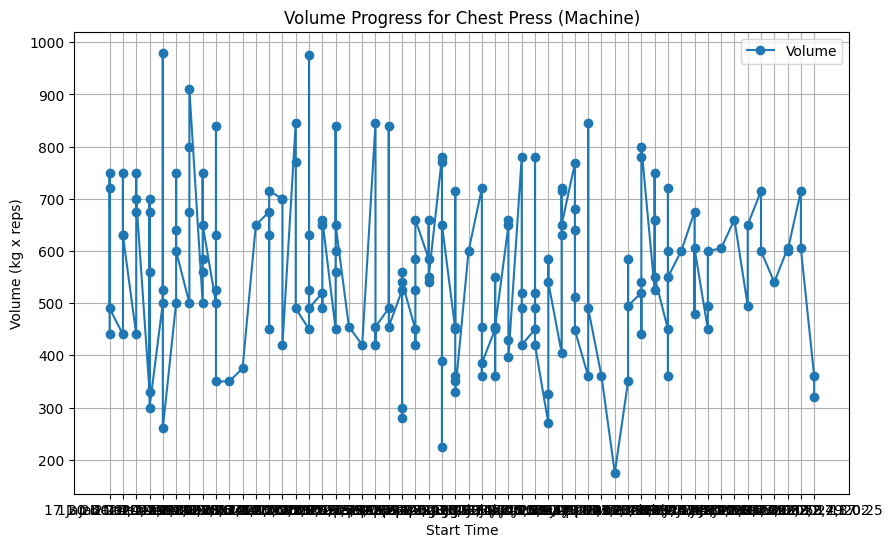

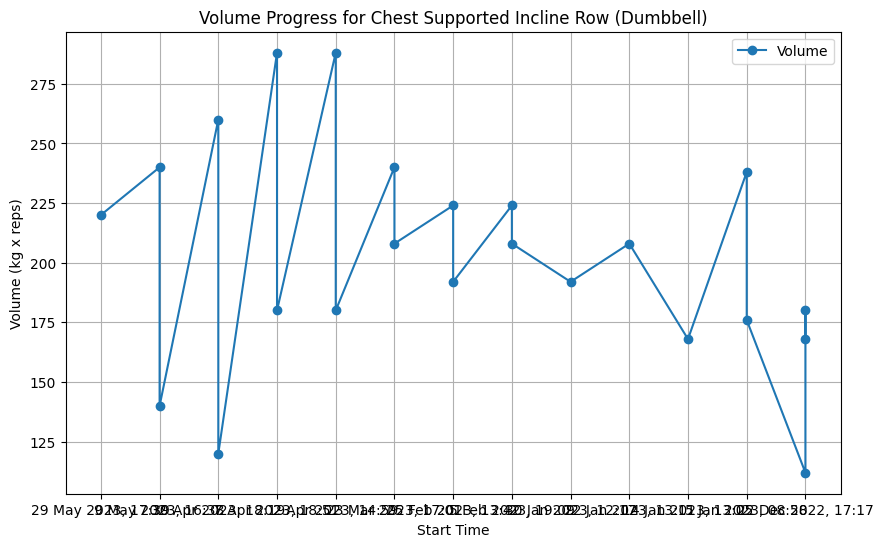

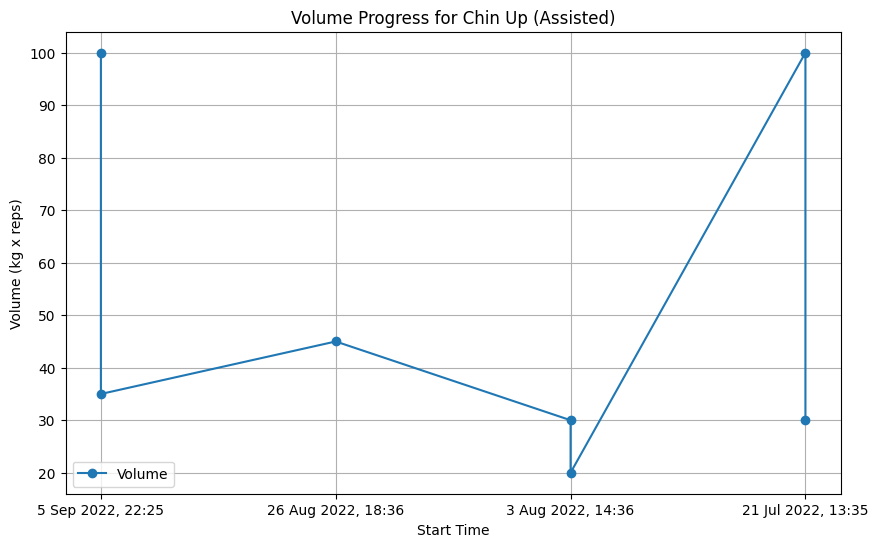

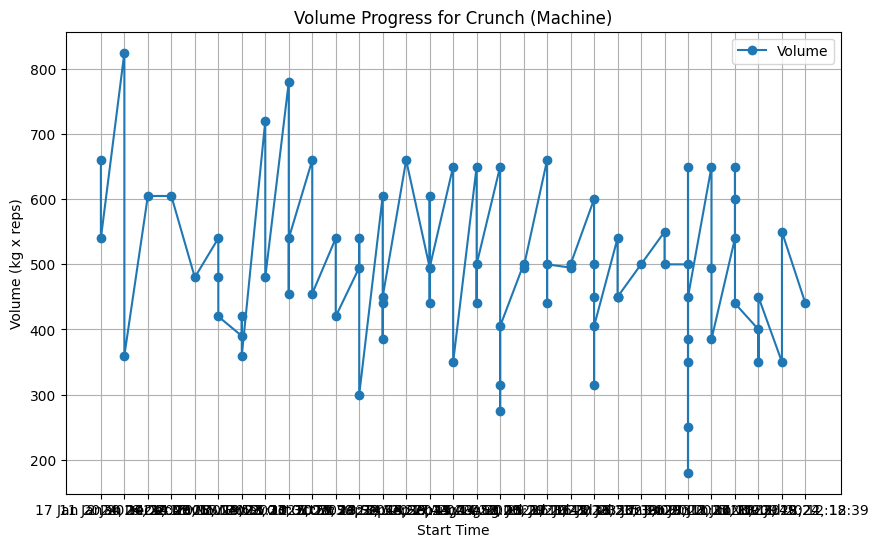

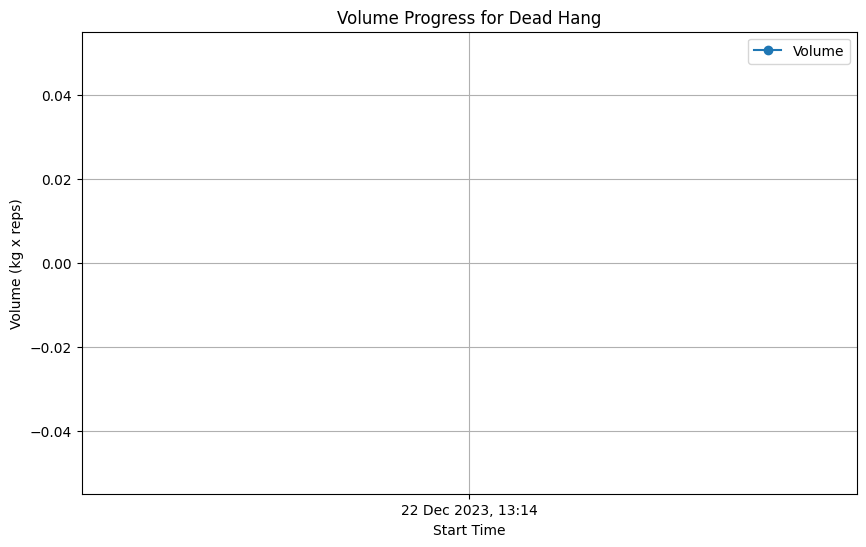

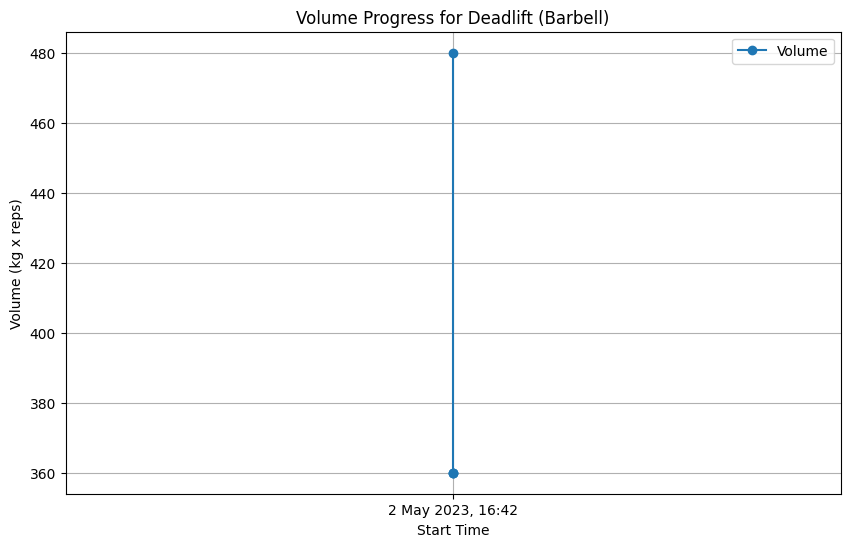

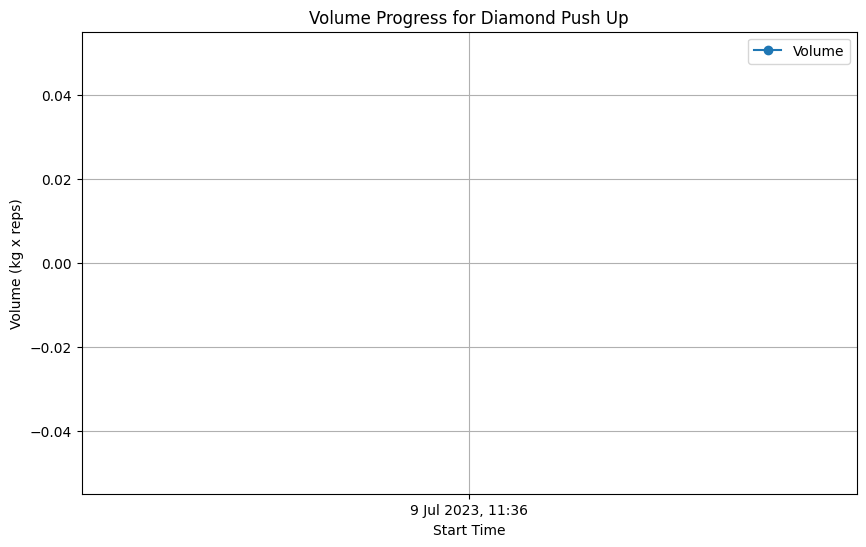

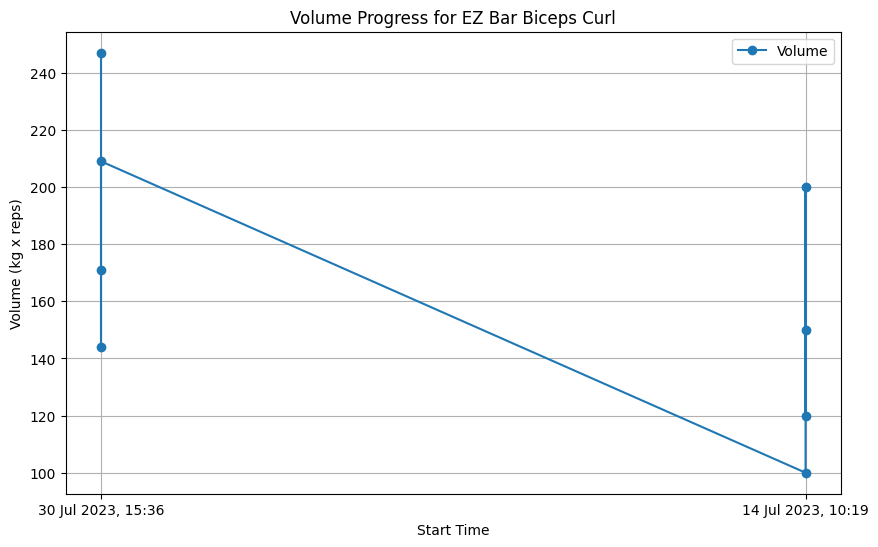

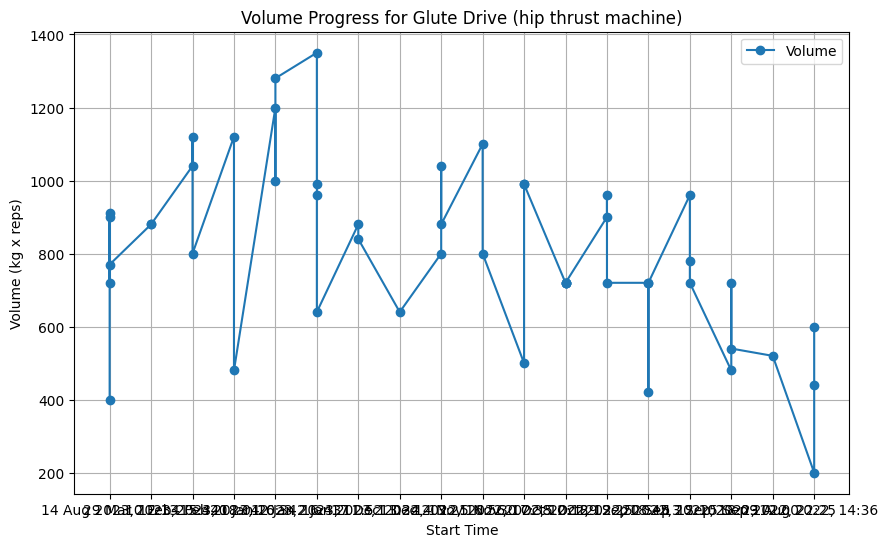

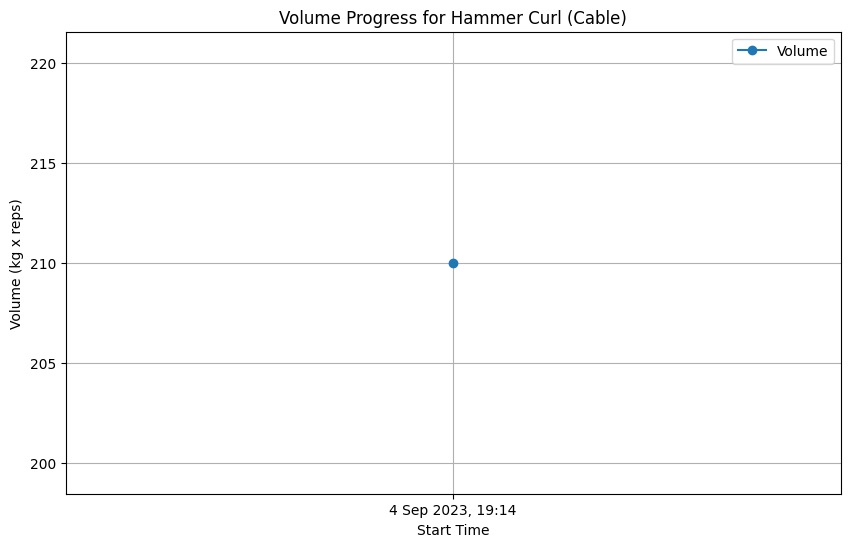

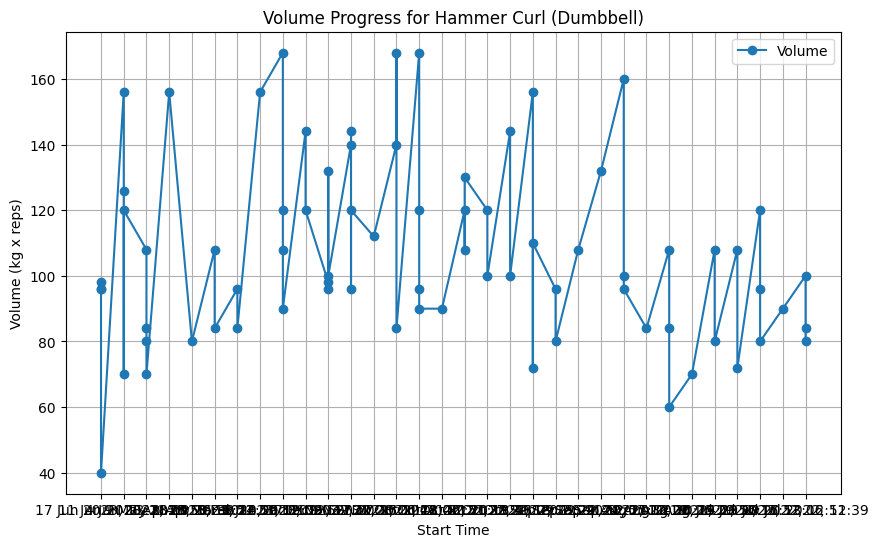

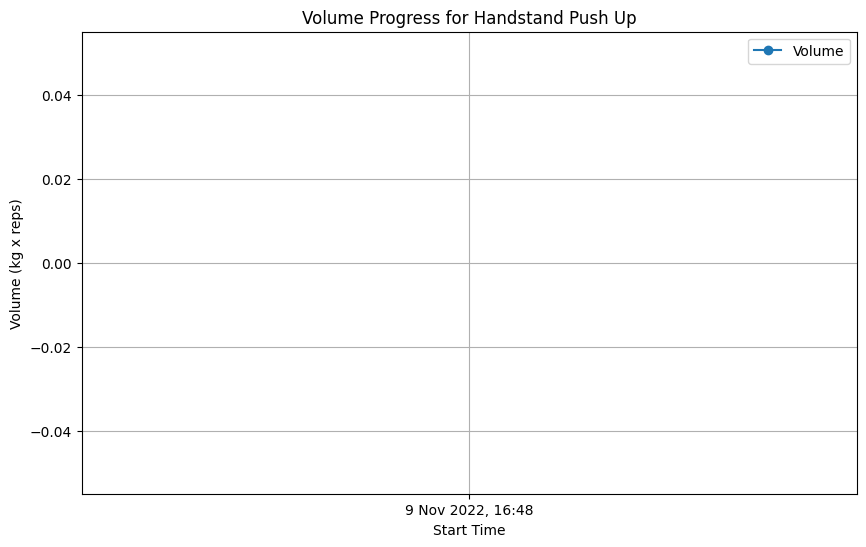

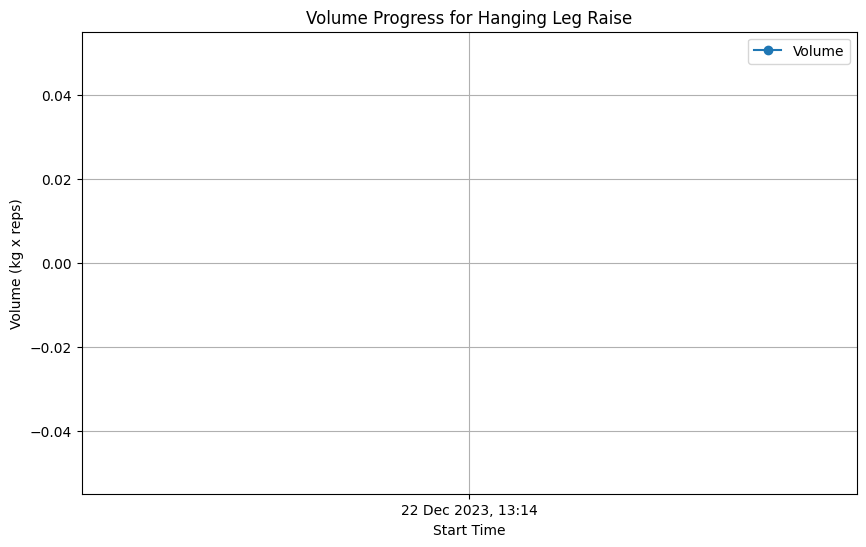

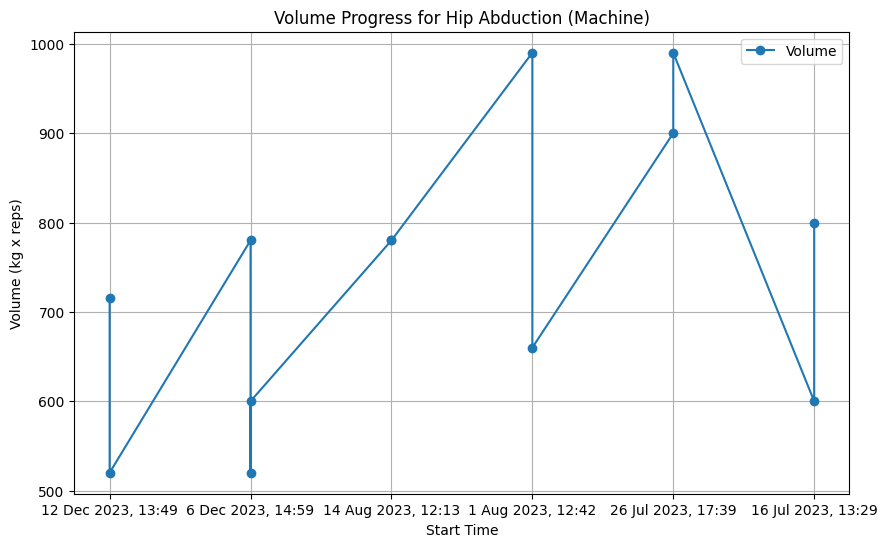

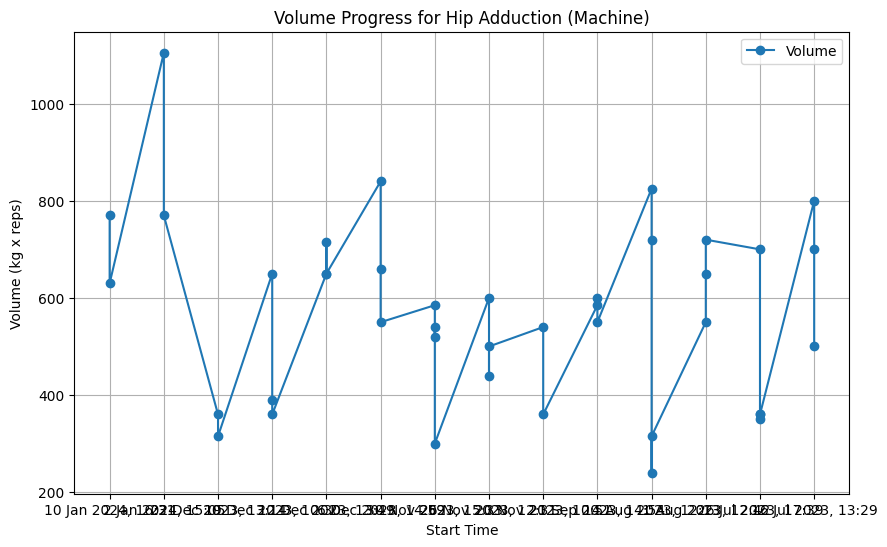

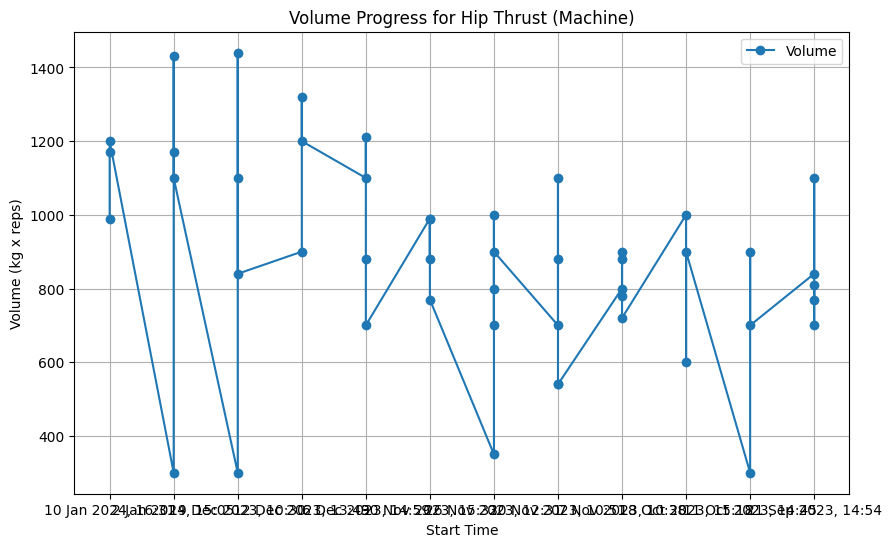

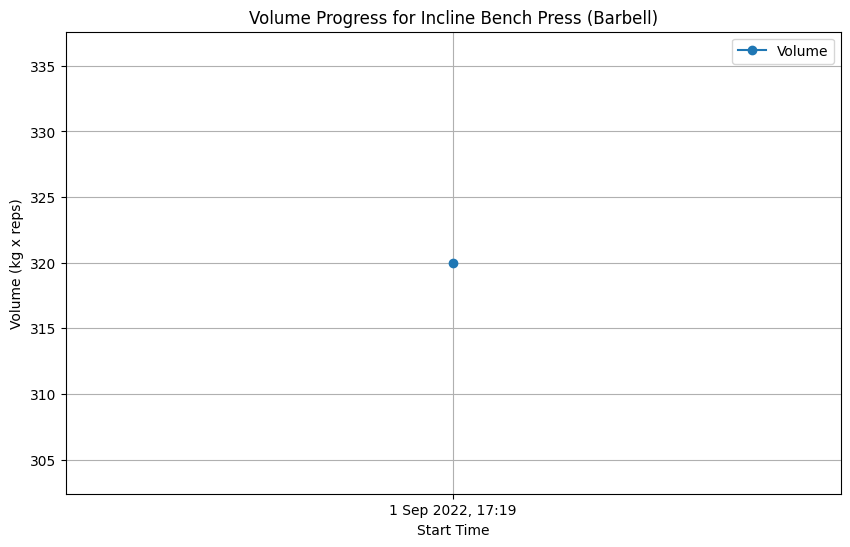

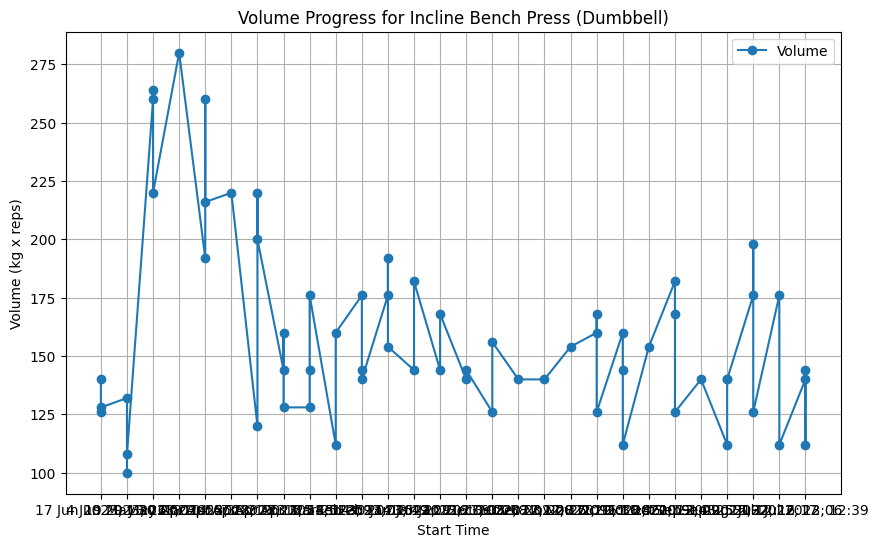

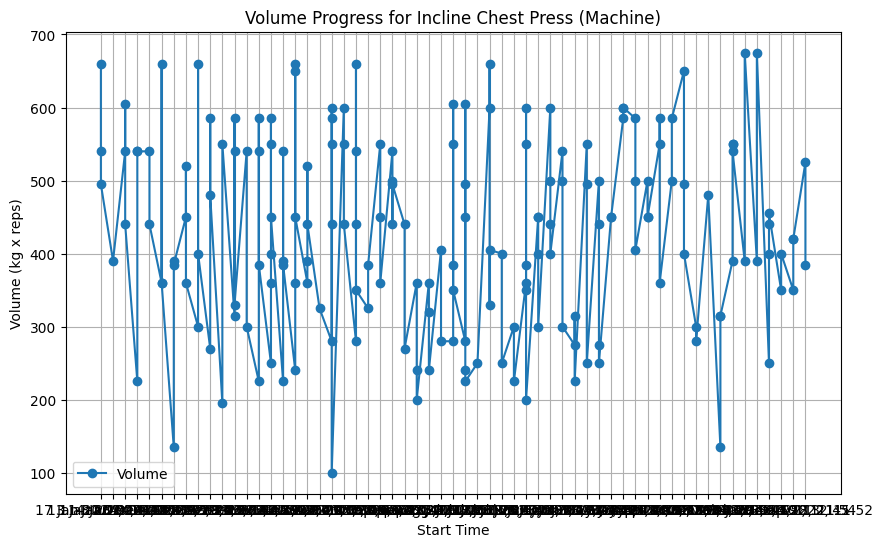

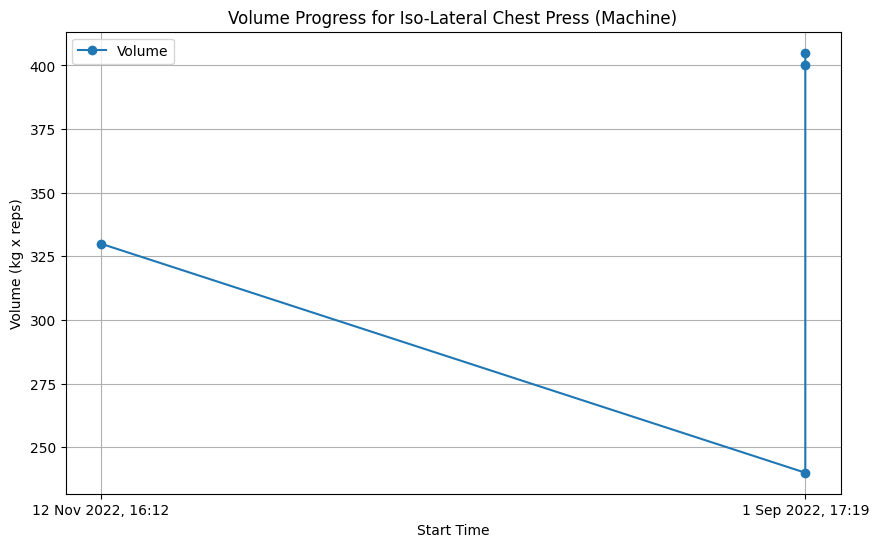

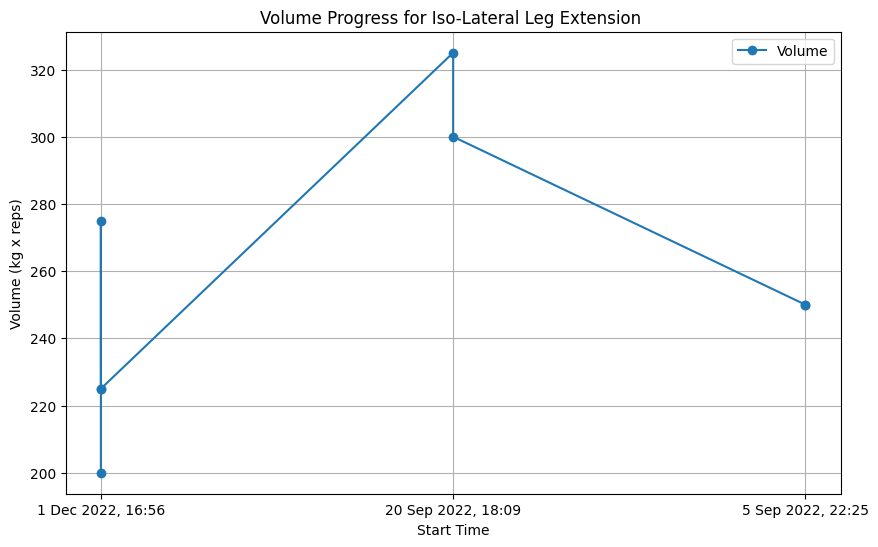

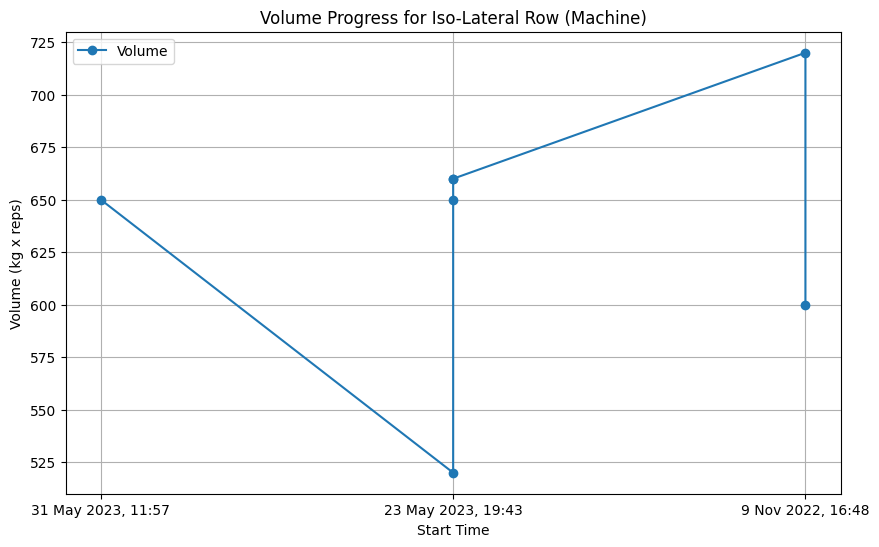

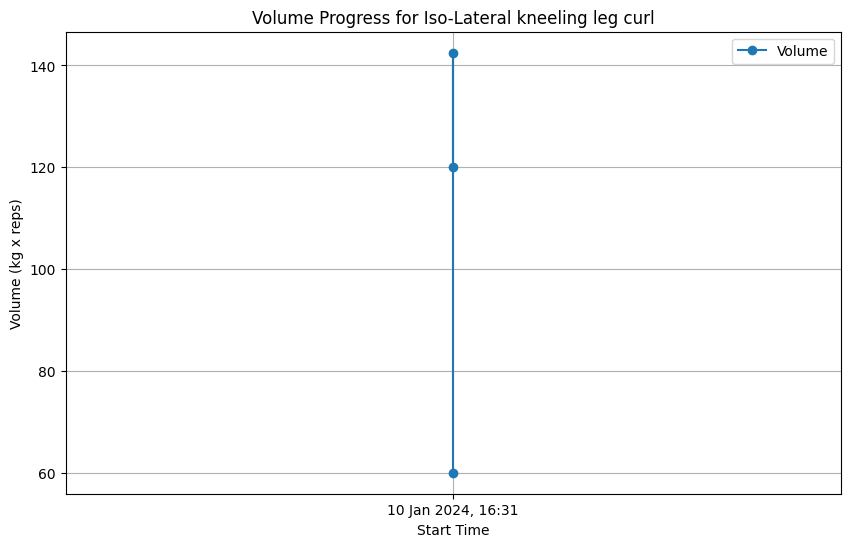

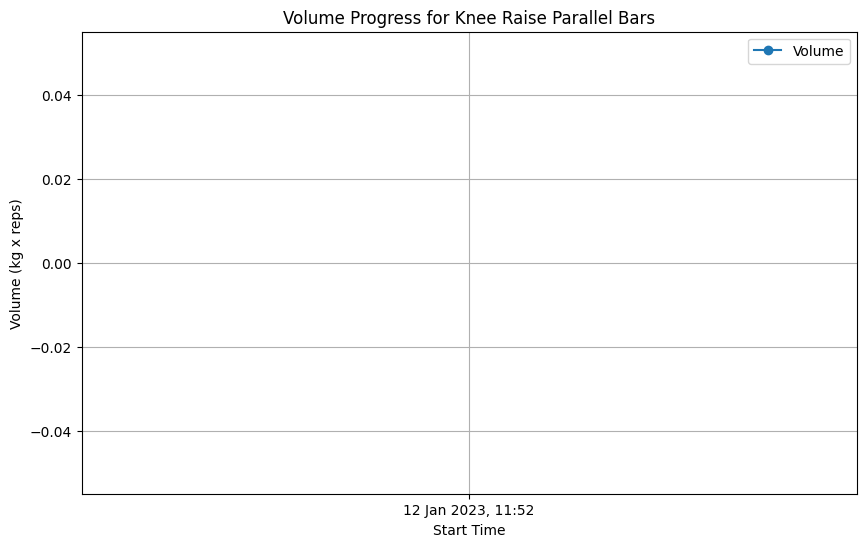

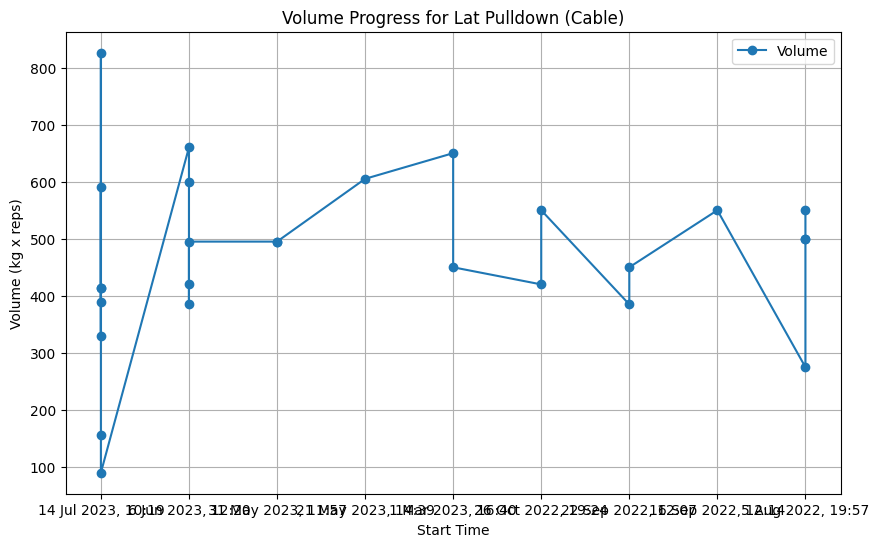

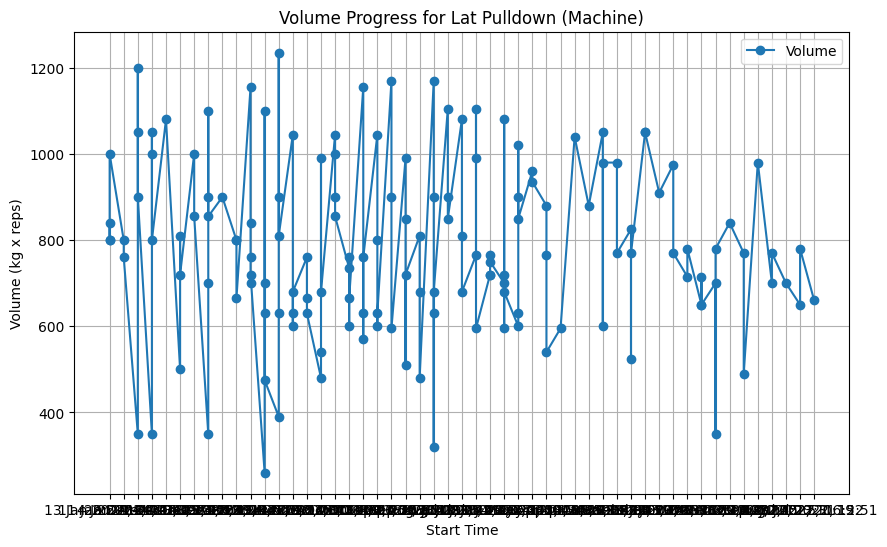

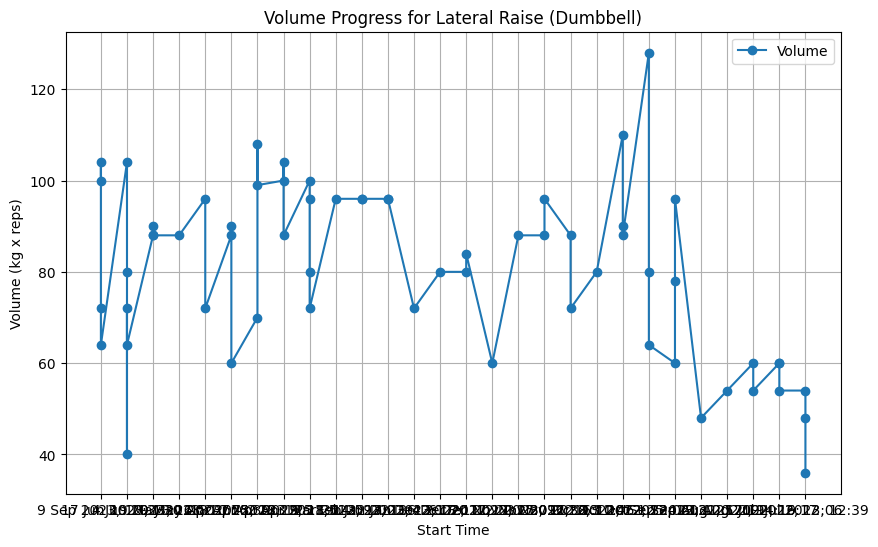

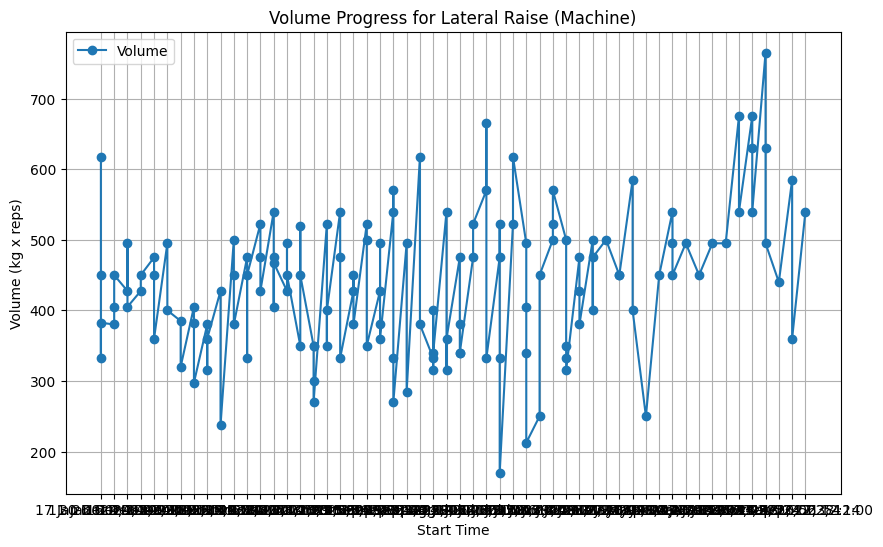

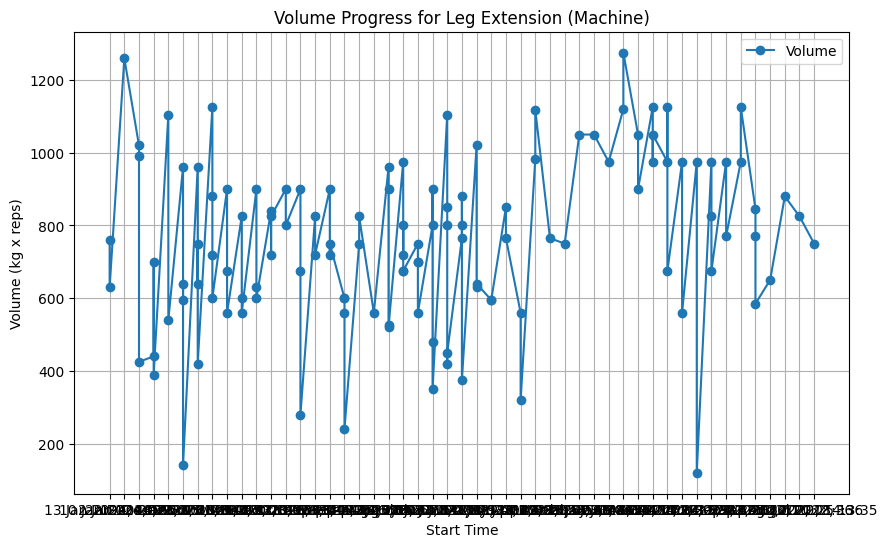

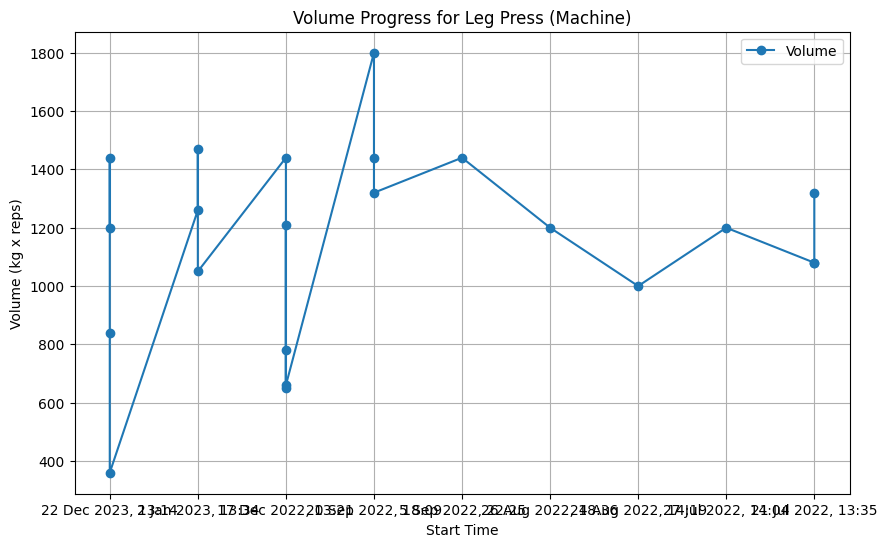

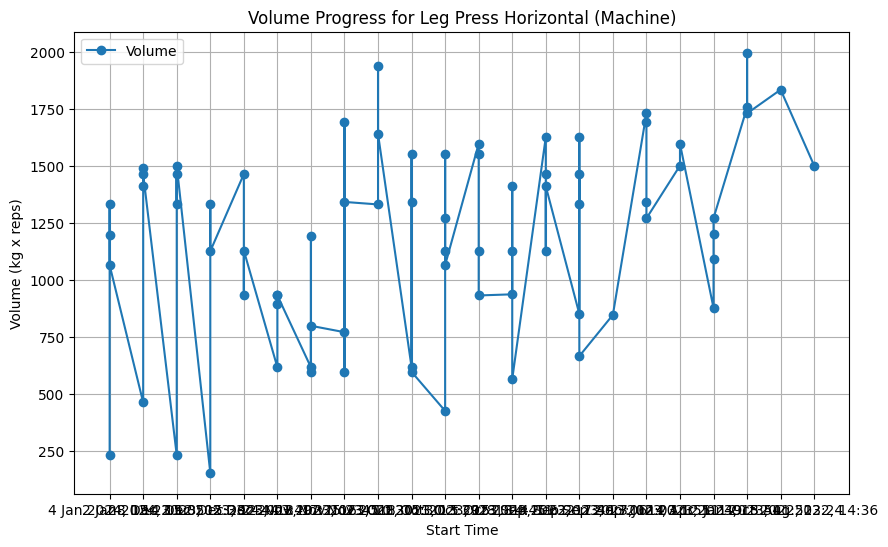

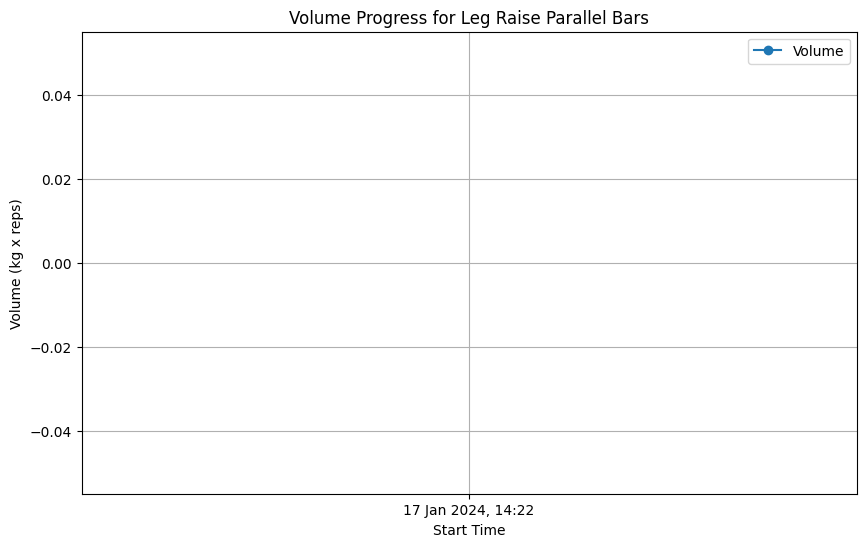

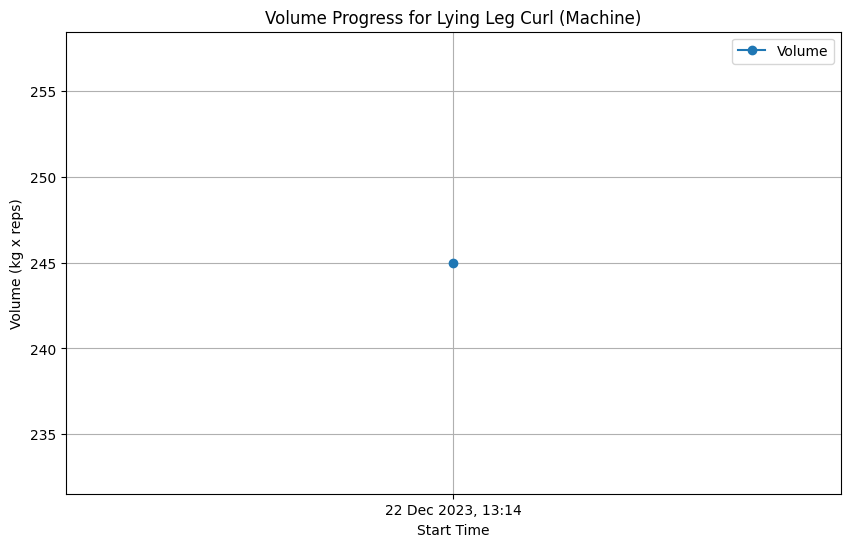

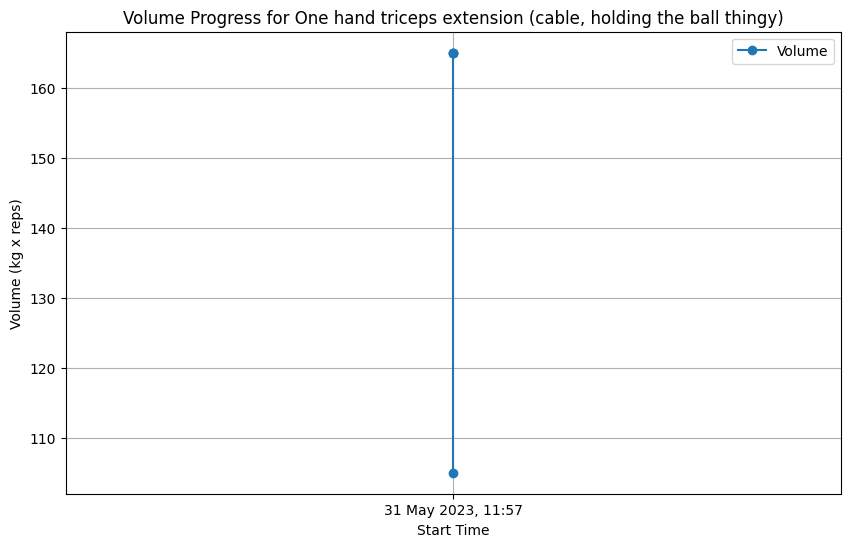

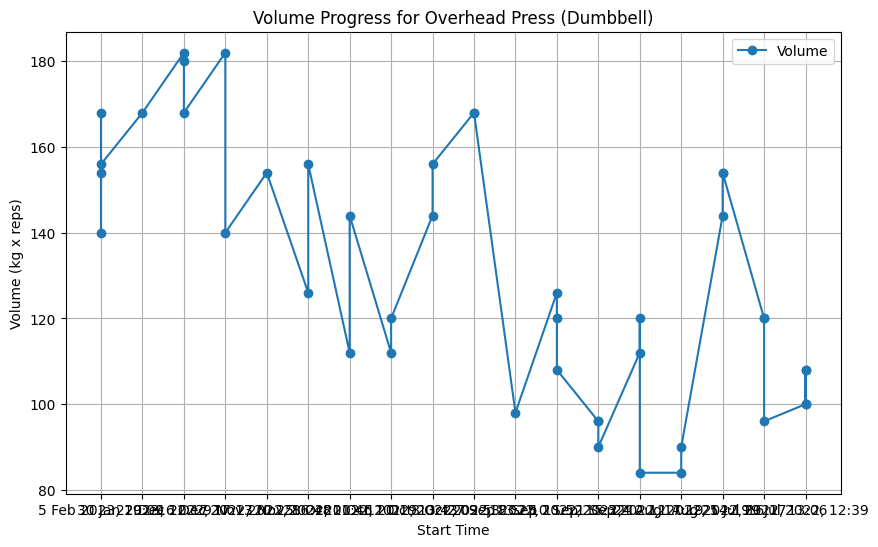

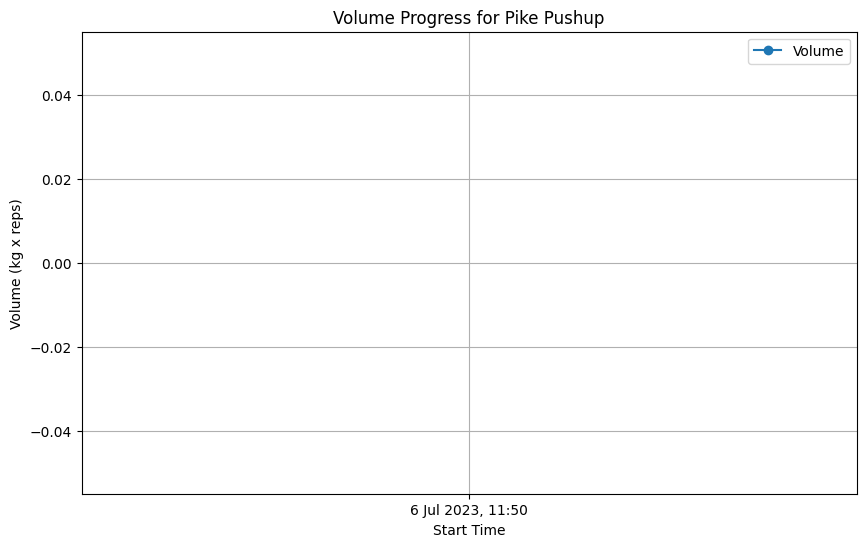

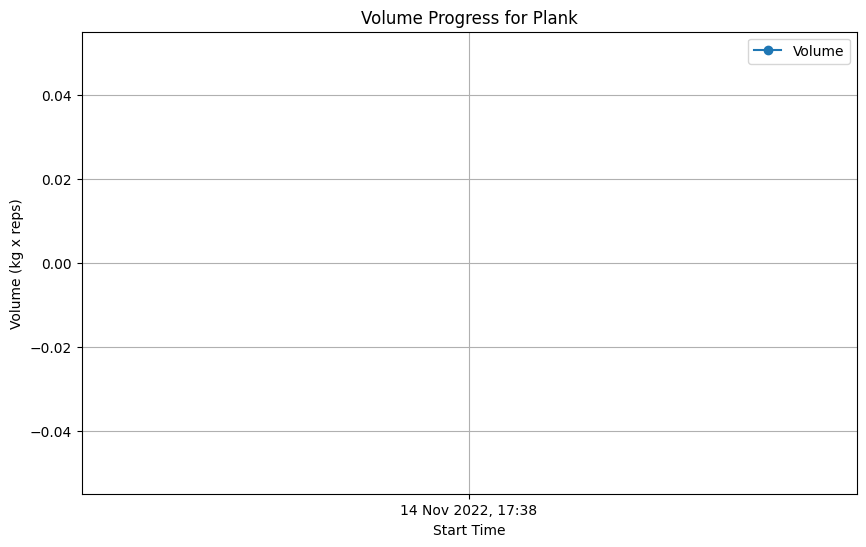

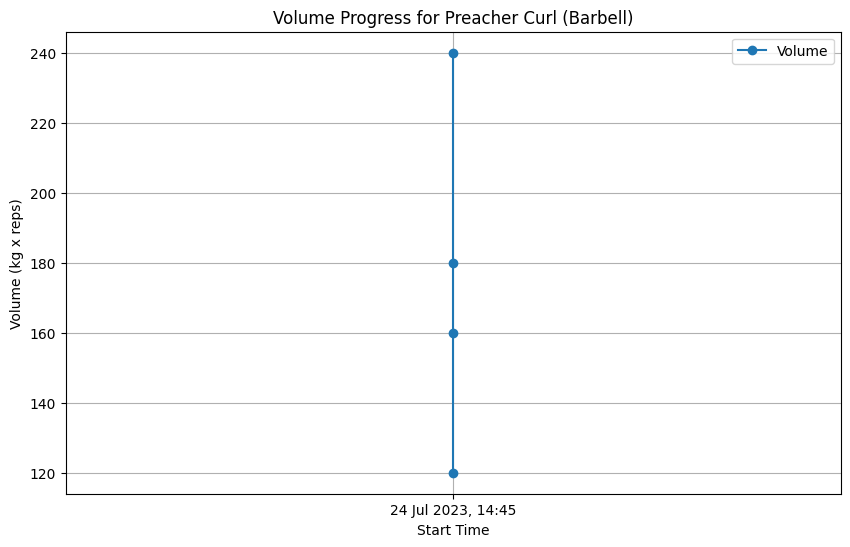

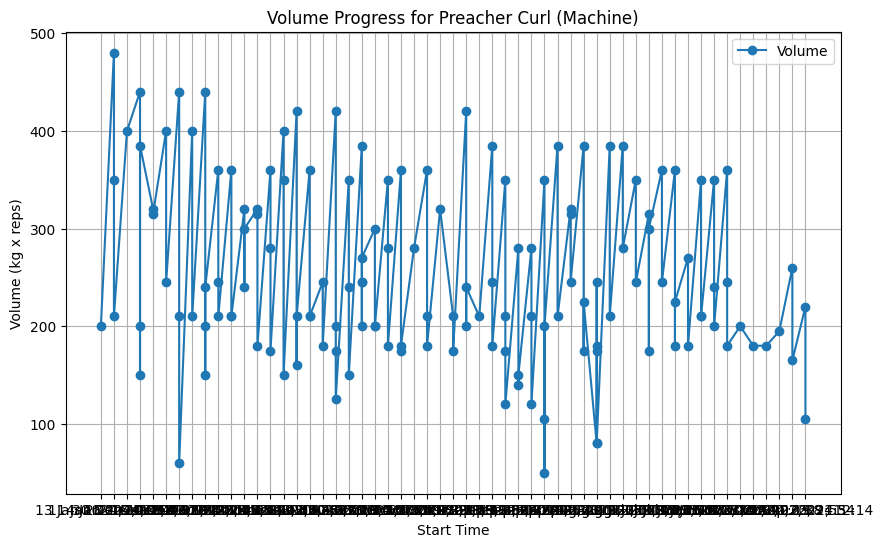

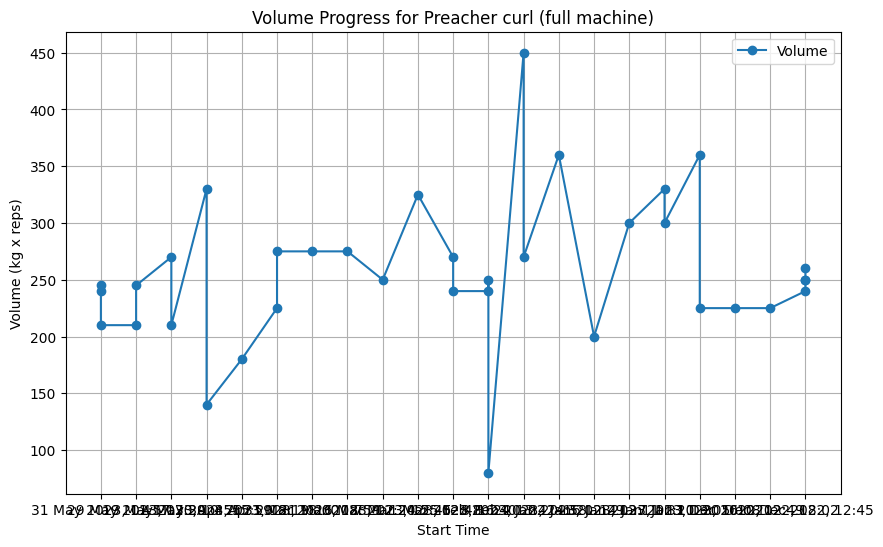

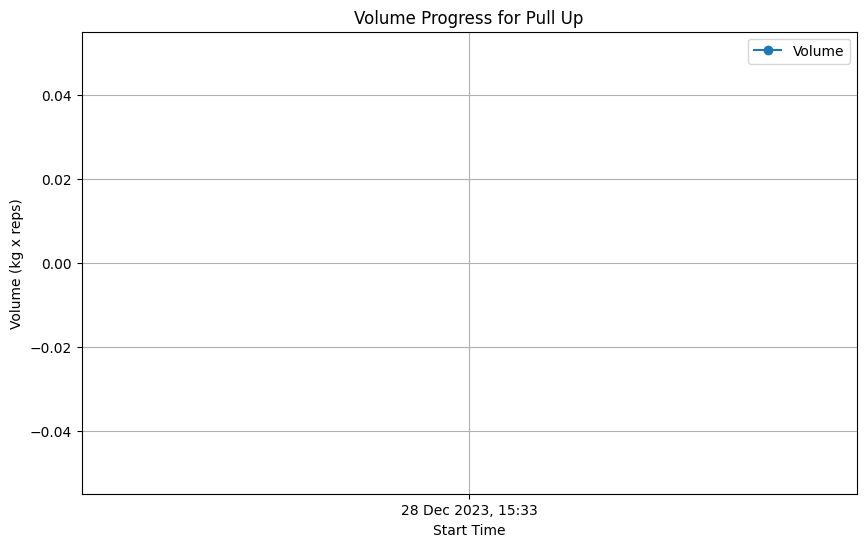

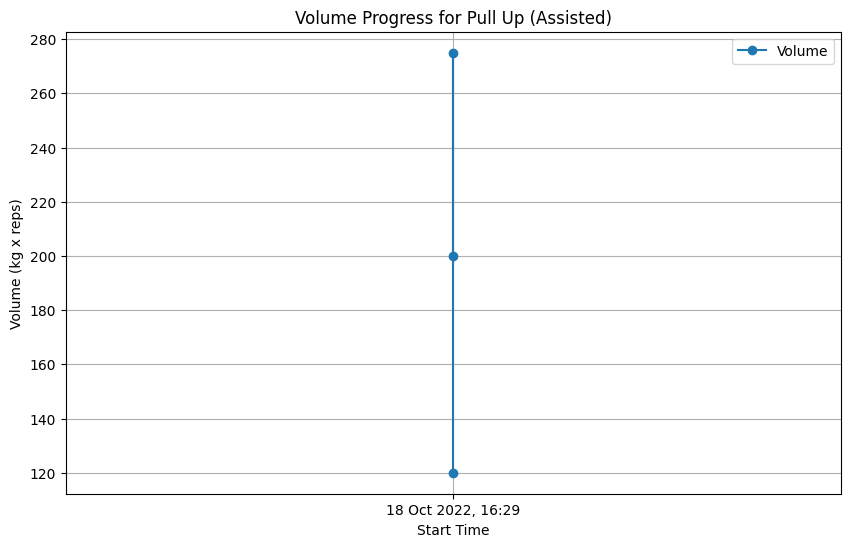

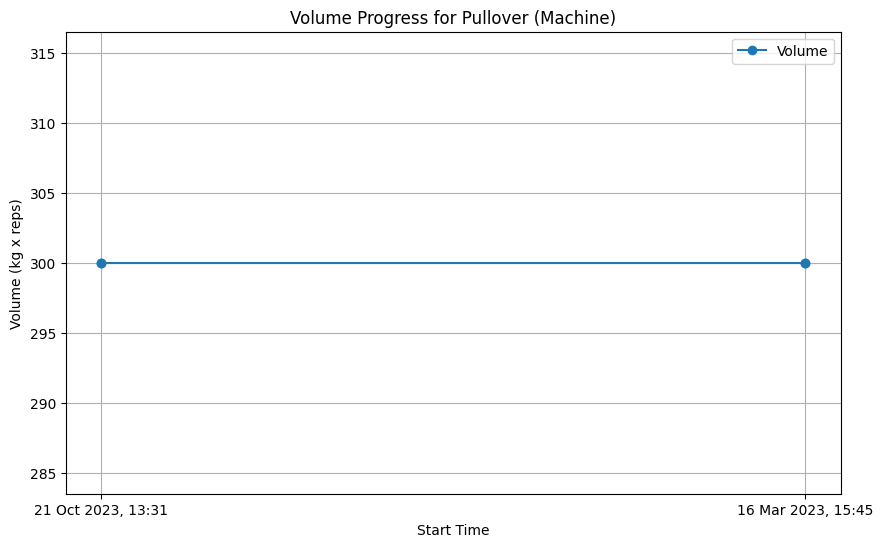

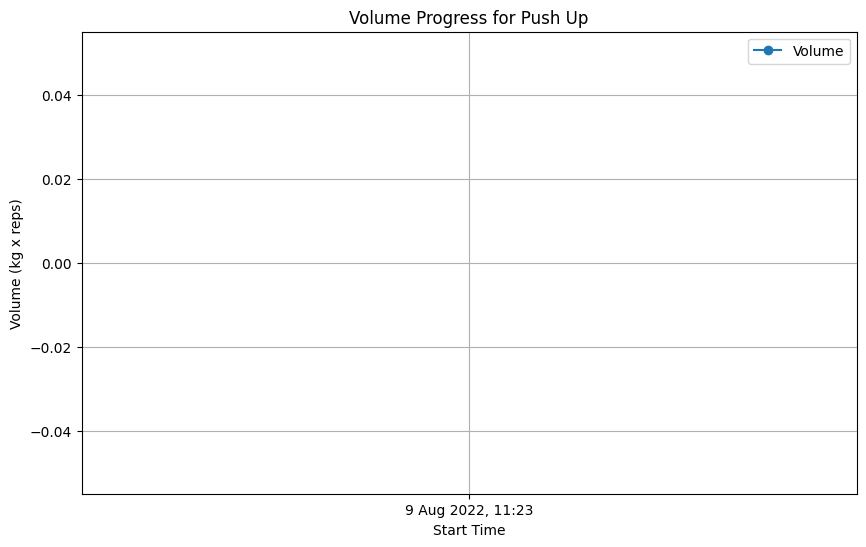

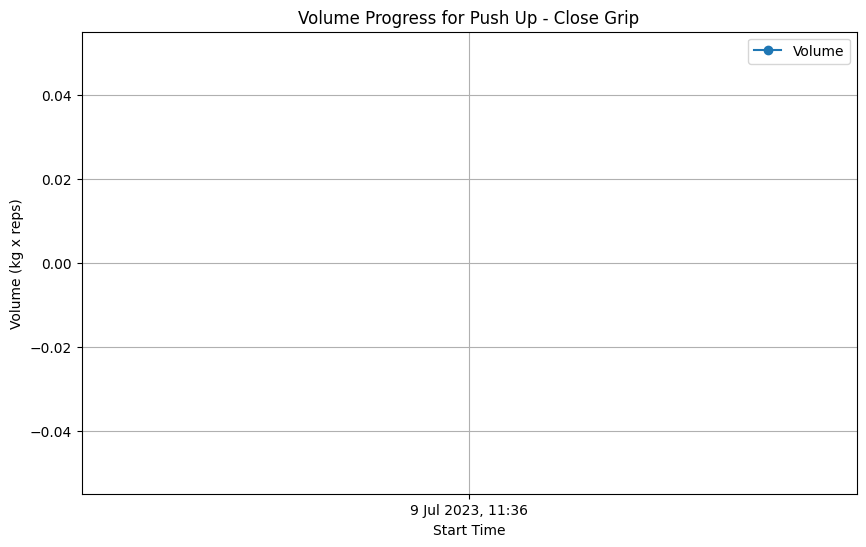

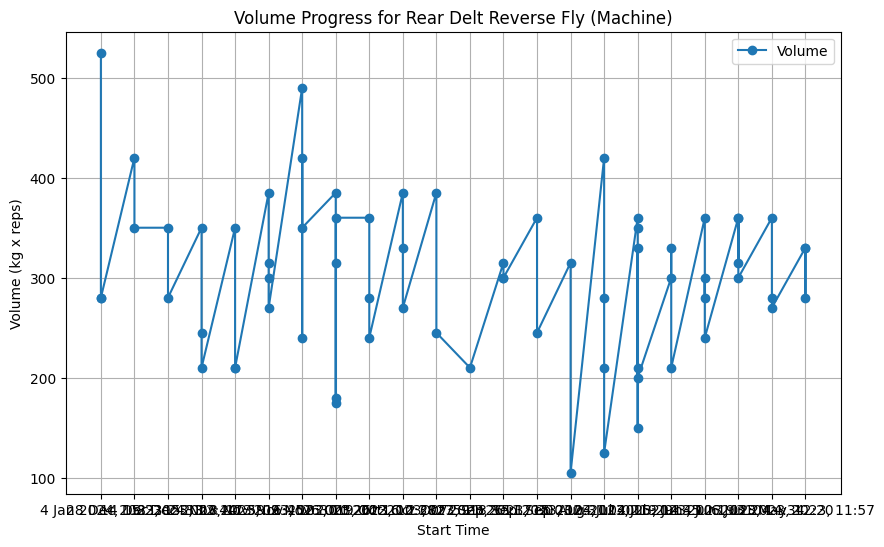

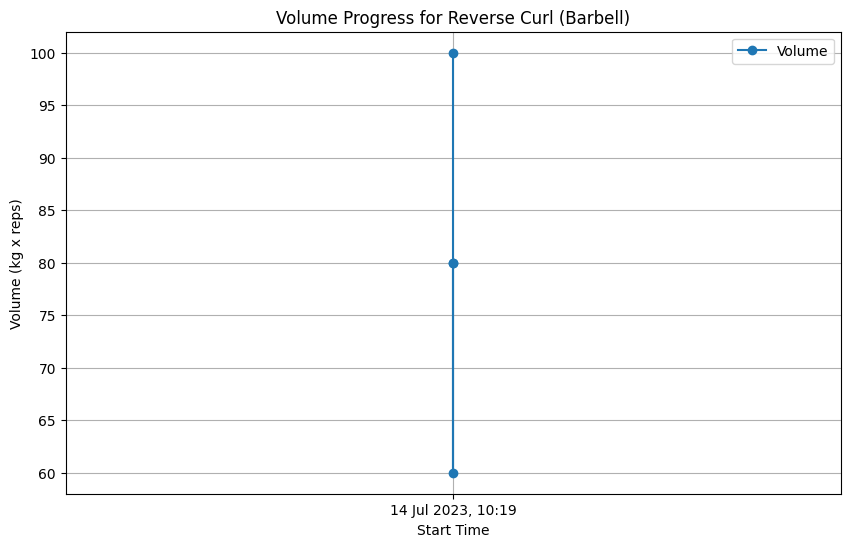

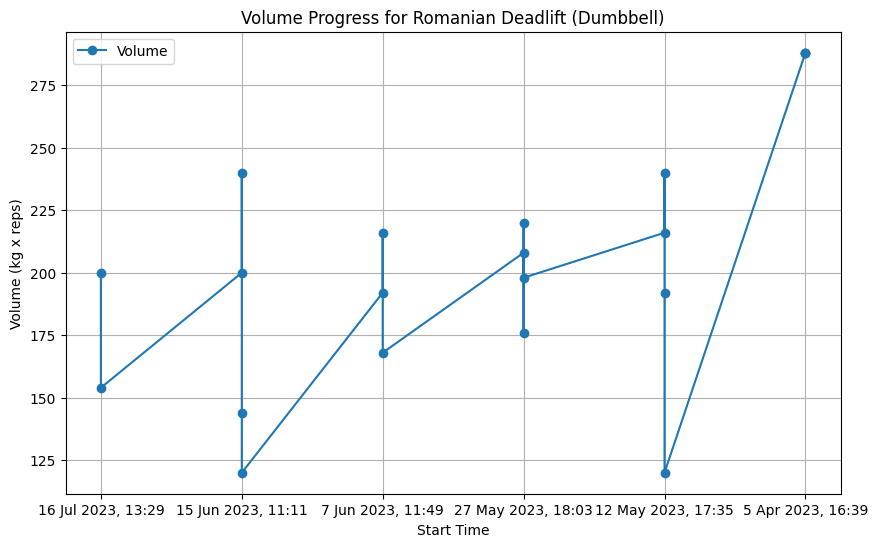

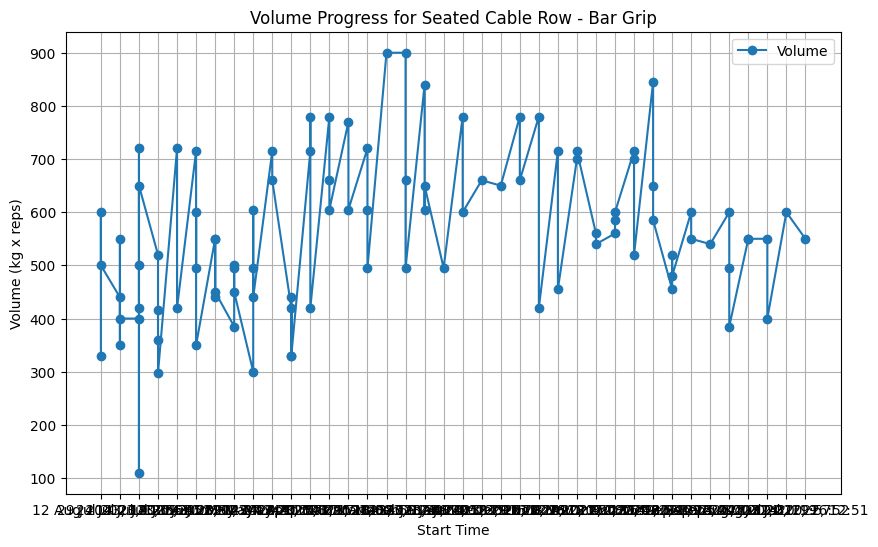

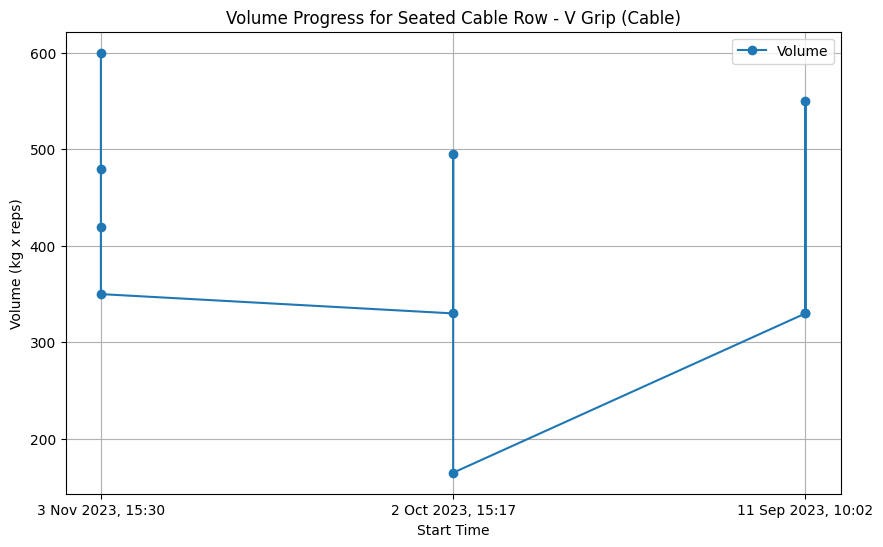

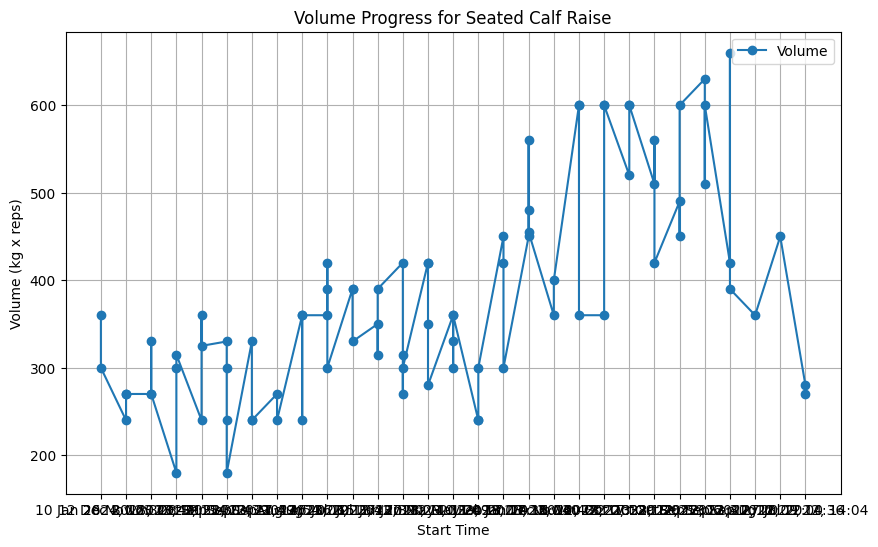

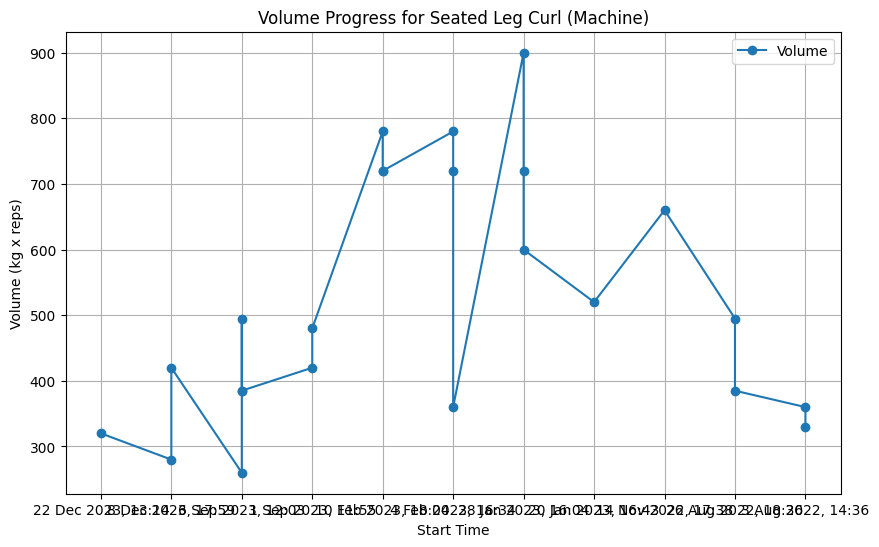

KeyboardInterrupt: 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV into DataFrame
df = pd.read_csv('workouts.csv')

# Group data by exercise title
grouped_data = df.groupby('exercise_title')

# Create a separate graph for each exercise
for exercise, group in grouped_data:
    # Calculate volume (weight_kg x reps)
    group['volume'] = group['weight_kg'] * group['reps']

    # Plot volume progress
    plt.figure(figsize=(10, 6))
    plt.plot(group['start_time'], group['volume'], marker='o', linestyle='-', label='Volume')
    
    # Customize plot
    plt.title(f'Volume Progress for {exercise}')
    plt.xlabel('Start Time')
    plt.ylabel('Volume (kg x reps)')
    plt.legend()
    plt.grid(True)

    # Show or save the plot
    plt.show()
    # Alternatively, save the plot to a file
    # plt.savefig(f'{exercise}_volume_progress.png')

    # Close the plot to avoid overlapping in the next iteration
    plt.close()
